# Human Activity Recognition (HAR) exploration

* Download data from [UCI repository](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/)
* An predictive analaysis, using tree and linear boosters, based on pre-engineered features are previoulsy performed in this [notebook](https://rpubs.com/burakh/har_xgb)
* In this repo we revisit the problem using deep learning algorithms

In [3]:
# Imports
import numpy as np
import os
from utils.utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Load the data:

In [4]:
X_train, labels_train, list_ch_train = read_data(data_path="./data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="./data/", split="train") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

In [6]:
print ("Training data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_train.shape[0],
                                                                             X_train.shape[1],
                                                                             X_train.shape[2]))
print ("Test data shape: N = {:d}, steps = {:d}, channels = {:d}".format(X_test.shape[0],
                                                                         X_test.shape[1],
                                                                         X_test.shape[2]))

print ("Channel names: ", list_ch_train)

Training data shape: N = 7352, steps = 128, channels = 9
Test data shape: N = 7352, steps = 128, channels = 9
Channel names:  ['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z']


These signals are raw and no feature engineering has been performed on them. Let's check whether each signal is normalized:

In [7]:
# Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[0],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[0],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=1)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=1)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

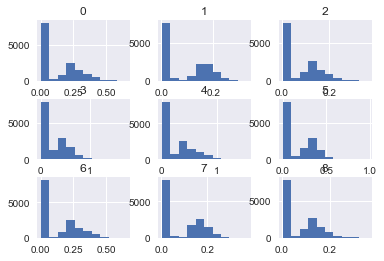

In [8]:
df_std.hist()
plt.show()

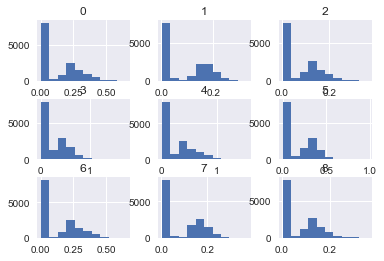

In [9]:
df_std.hist()
plt.show()

Some channels have mean values near 1, most close to 0. Let's standardize them all using the utilities:

In [10]:
X_train, X_test = standardize(X_train, X_test)

In [11]:
# Check Mean value for each channel at each step
all_data = np.concatenate((X_train,X_test), axis = 0)
means_ = np.zeros((all_data.shape[0],all_data.shape[2]))
stds_ = np.zeros((all_data.shape[0],all_data.shape[2]))

for ch in range(X_train.shape[2]):
    means_[:,ch] = np.mean(all_data[:,:,ch], axis=1)
    stds_[:,ch] = np.std(all_data[:,:,ch], axis=1)
    
df_mean = pd.DataFrame(data = means_)
df_std = pd.DataFrame(data = stds_)

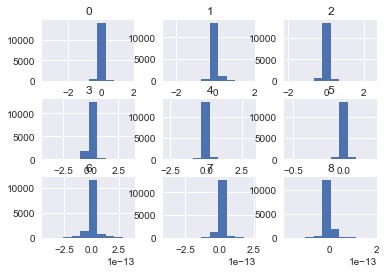

In [13]:
df_mean.hist()
plt.show()

Now, all the means are 0 and standard deviations are 1.

Let's see how the signals look like for a given example:

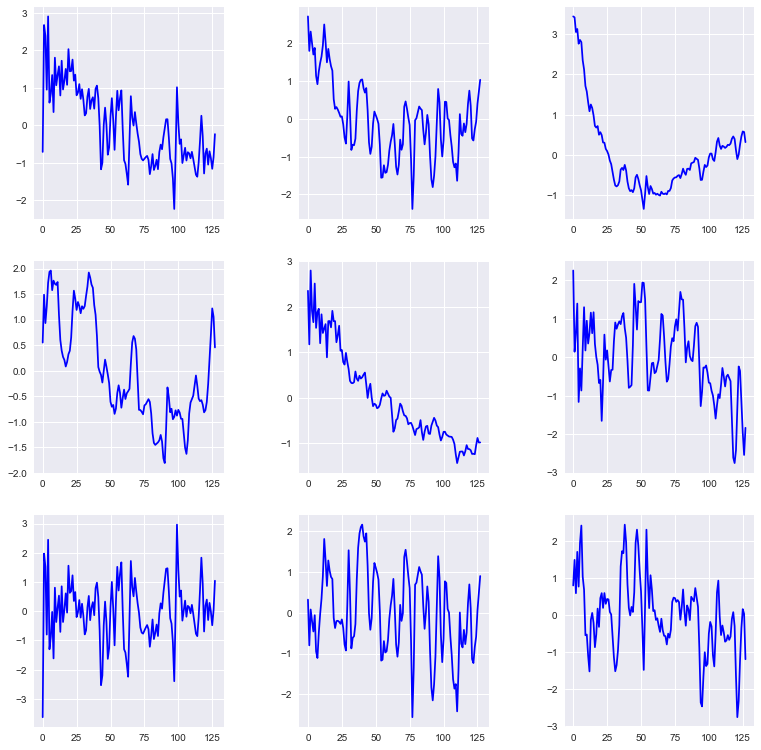

In [24]:
# Set up the figure
data_lenght = all_data.shape[1]


fig = plt.figure(figsize = (10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.4)

# Plot
x = np.arange(data_lenght)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    l1 = ax.plot(x,all_data[0,:,i], color = "blue")
